# Exploratory Data Analysis - Fine Wines

In [224]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import visualisations as vis

sns.set_theme(context='notebook', style='darkgrid', palette='tab10')

In [225]:
df = pd.read_csv('../data/clean_combined_wines.csv')
# set name column as index
df.set_index('name', inplace=True)
print(df.shape)
df.head()

(60265, 12)


,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,reviewed_by,from_vivino
name,,,,,,,,,,,,
00 Wines Vgw Chardonnay 2017,Willamette Valley,United States,2017,00 Wines,white,Chardonnay,79.99,0.0,0,13.0,"JS, WE, WS",False
00 Wines Vgr Pinot Noir 2019,Willamette Valley,United States,2019,00 Wines,red,Pinot Noir,99.99,0.0,0,12.9,"WE, JS, RP",False
00 Wines Egw Chardonnay 2019,Willamette Valley,United States,2019,00 Wines,white,Chardonnay,115.99,0.0,0,NaN,"JS, RP, WE",False
100 Nails Ranch Pinot Noir 2019,Central Coast,United States,2019,100 Nails Ranch,red,Pinot Noir,16.99,0.0,0,14.2,WW,False
100 Nails Ranch Chardonnay 2019,Sonoma County,United States,2019,100 Nails Ranch,white,Chardonnay,16.99,0.0,0,14.2,0,False


In [226]:
# Isolate fine wines as defined by costing $100 or more.
df = df[df['price'] > 100]
df['age'] = df['vintage'].apply(lambda x: 2024 - int(x))
df['log_price'] = np.log(df['price'])
df = df[df['rating_qty'] > 20]
# Create measures for price per star
df['log_price_per_star'] = df['log_price'] / df['rating']
df['price_per_star'] = df['price'] / df['rating']
print(df.shape)
df.describe()

(2628, 16)


,vintage,price,rating,rating_qty,abv,age,log_price,log_price_per_star,price_per_star
count,2628.000000,2628.000000,2628.000000,2628.000000,77.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,2011.109589,248.529414,4.381393,407.840563,13.925844,12.890411,5.274487,1.203050,55.796343
std,5.373540,254.919552,0.202177,724.958239,0.730129,5.373540,0.609402,0.116898,54.916447
min,1988.000000,100.480000,3.300000,21.000000,12.000000,5.000000,4.609959,0.940078,21.998000
25%,2009.000000,120.160000,4.300000,68.000000,13.500000,9.000000,4.788824,1.123848,28.205000
50%,2013.000000,167.090000,4.400000,157.000000,14.000000,11.000000,5.118533,1.178977,37.976136
75%,2015.000000,270.122500,4.500000,468.000000,14.500000,15.000000,5.598876,1.260476,60.027222
max,2019.000000,3700.660000,5.000000,6711.000000,15.800000,36.000000,8.216266,1.748142,787.374468


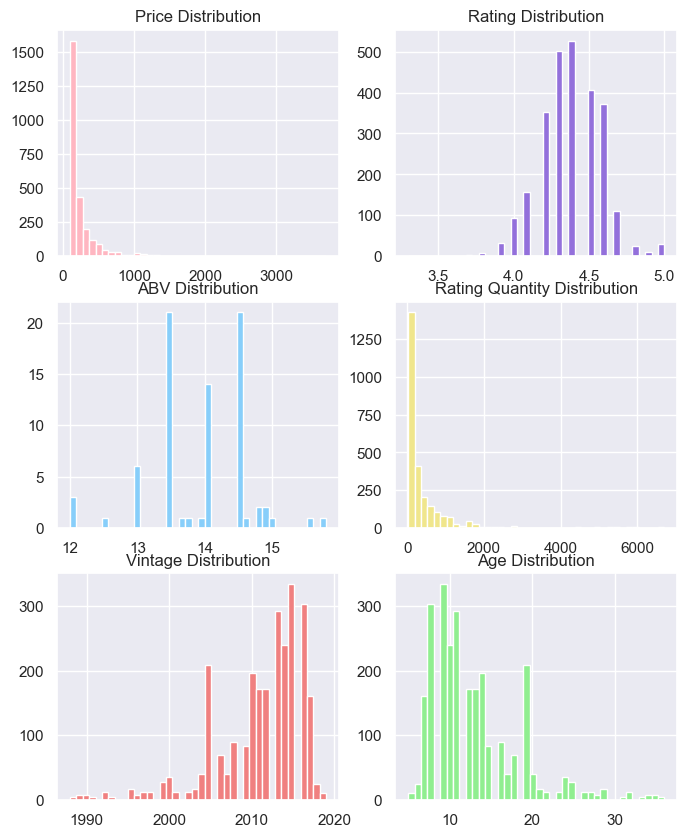

In [227]:

fig, axs = plt.subplots(3, 2, figsize=(8, 10))  
bins = 40
axs[0, 0].hist(df['price'], bins=bins, color='lightpink')
axs[0, 0].set_title('Price Distribution')
axs[0, 0].grid(True)

axs[0, 1].hist(df['rating'], bins=bins, color='mediumpurple')
axs[0, 1].set_title('Rating Distribution')
axs[0, 1].grid(True)

axs[1, 0].hist(df['abv'], bins=bins, color='lightskyblue')
axs[1, 0].set_title('ABV Distribution')
axs[1, 0].grid(True)

axs[1, 1].hist(df['rating_qty'], bins=bins, color='khaki')
axs[1, 1].set_title('Rating Quantity Distribution')
axs[1, 1].grid(True)

axs[2, 0].hist(df['vintage'], bins=bins, color='lightcoral')
axs[2, 0].set_title('Vintage Distribution')
axs[2, 0].grid(True)

axs[2, 1].hist(df['age'], bins=bins, color='lightgreen')
axs[2, 1].set_title('Age Distribution')
axs[2, 1].grid(True);

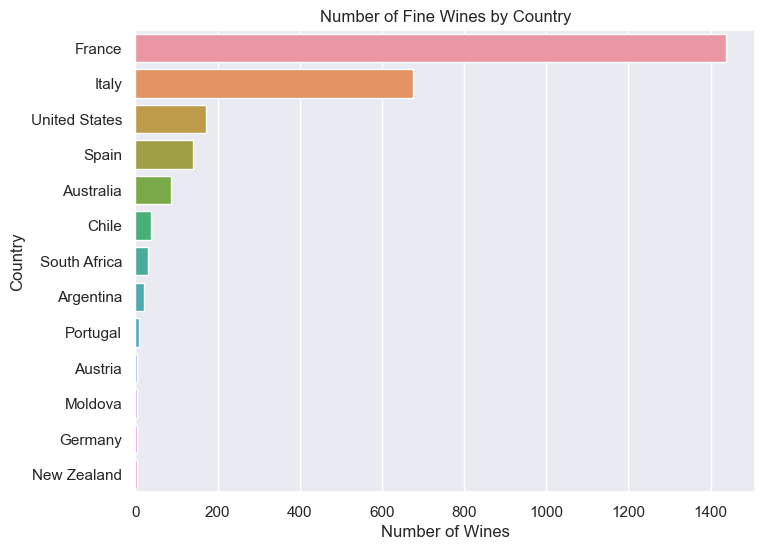

In [228]:
count_wines_by_country = df['country'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=count_wines_by_country.values, y=count_wines_by_country.index)
plt.xlabel('Number of Wines')
plt.ylabel('Country')
plt.title('Number of Fine Wines by Country');

In [229]:
# Remove countries with less then 100 wines from the dataframe
df = df[df['country'].isin(count_wines_by_country[count_wines_by_country >= 100].index)]

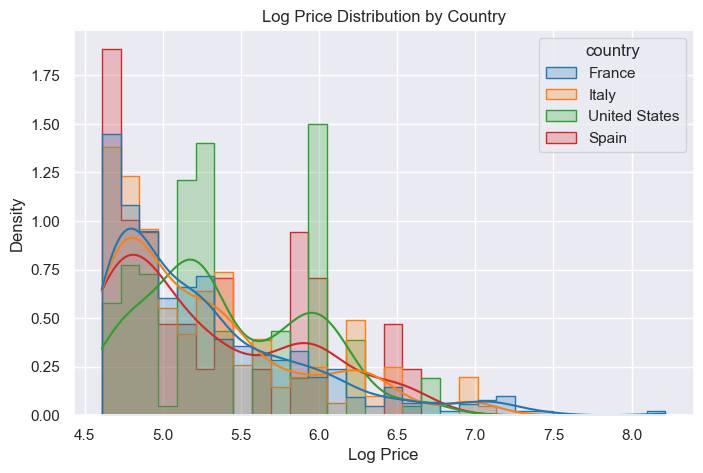

In [230]:
plt.figure(figsize=(8, 5))  # Adjust the size as needed
sns.histplot(data=df, x='log_price', hue='country', element='step', stat='density', common_norm=False, kde=True)
plt.title('Log Price Distribution by Country')
plt.xlabel('Log Price')
plt.ylabel('Density');

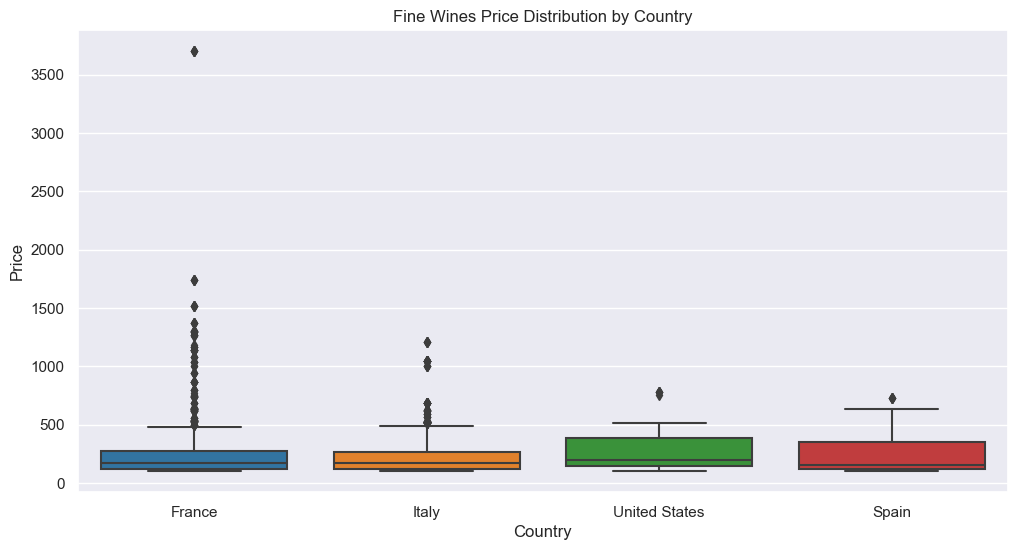

In [231]:
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.boxplot(x='country', y='price', data=df)
plt.title('Fine Wines Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price');

- US has wider spread of prices. 
- France has the bulk of extrenely expensive wines. 

# Correlations

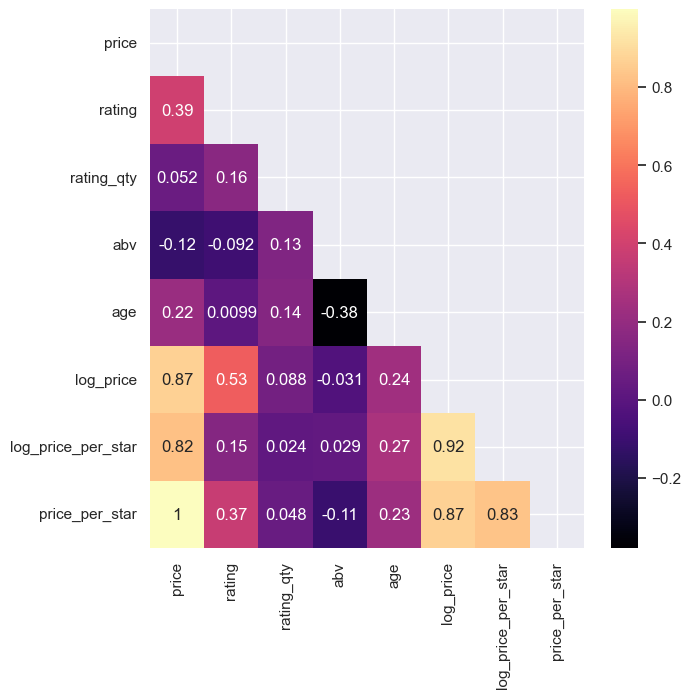

In [232]:
# Correlations on all numeric values 
numeric = df.drop(columns = [ 'region', 'country', 'vintage', 'producer', 'wine_variety',
       'grape_variety','reviewed_by','from_vivino'])

plt.figure(figsize=(7, 7))
mask = np.zeros_like(numeric.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(numeric.corr(), mask = mask, annot=True, cmap='magma');

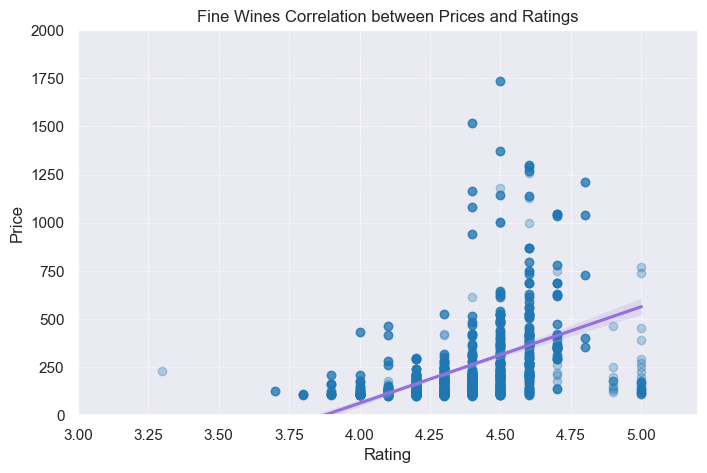

In [233]:
plt.figure(figsize=(8, 5))
sns.regplot(x='rating', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Fine Wines Correlation between Prices and Ratings')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.xlim(3, 5.2)
plt.ylim(0, 2000)
plt.grid(True, which="both", ls="--", linewidth=0.5);

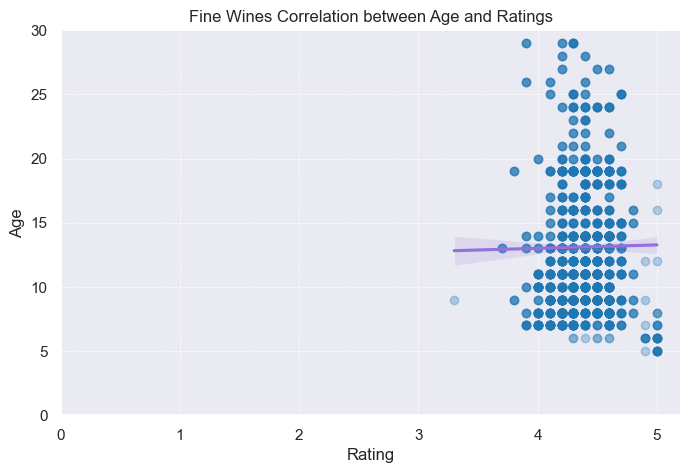

In [234]:
# Interestingly no correlation between rating and age for fine wines. 
plt.figure(figsize=(8, 5))
sns.regplot(x='rating', y='age', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Fine Wines Correlation between Age and Ratings')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.xlim(0, 5.2)
plt.ylim(0, 30)
plt.grid(True, which="both", ls="--", linewidth=0.5);

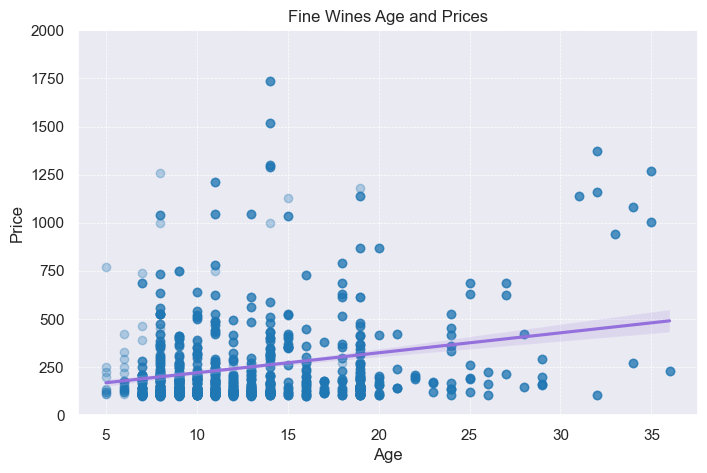

In [235]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Fine Wines Age and Prices')
plt.xlabel('Age')
plt.ylabel('Price')
plt.ylim(0, 2000)
plt.grid(True, which="both", ls="--", linewidth=0.5);

- No correlation between rating and age for fine wines.
- 0.39 correlation between price and rating (0.53 for log price and rating).
- Price and age are correlated. 

# Price

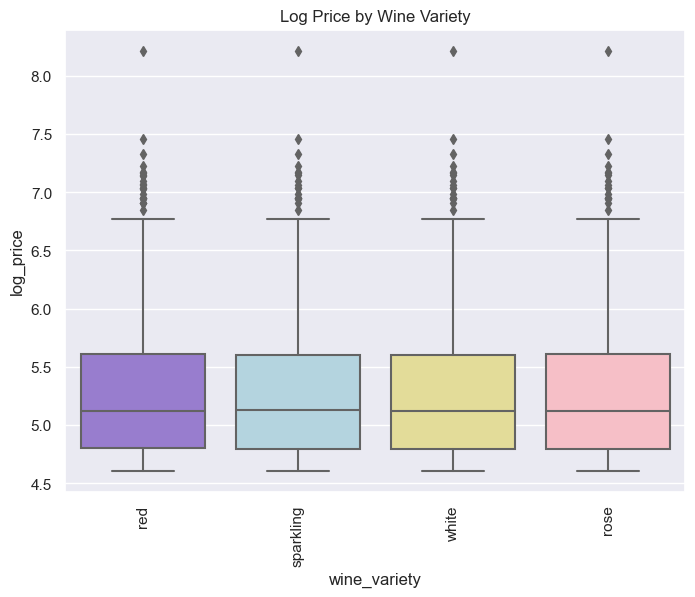

In [236]:
colour_mapping = {
    'red': 'mediumpurple',
    'rose': 'lightpink',
    'white': 'khaki',
    'sparkling': 'lightblue'
}

plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_variety', y='log_price', data=df, palette=colour_mapping)
plt.xticks(rotation=90)
plt.title('Log Price by Wine Variety');

### Producers and Price

producer
Gaja                          100
Chateau Leoville Las Cases     54
Chateau Ducrubeaucaillou       52
Chateau Montrose               40
Chateau Mouton Rothschild      38
Chateau Pontetcanet            38
Chateau Hautbrion              37
Vietti                         36
Antinori                       36
Cos Destournel                 34
Tenuta San Guido               32
Chateau Belairmonange          32
M Chapoutier                   31
Chateau Pape Clement           31
Chateau Certan De May          28
Quintarelli Giuseppe           28
Chateau Figeac                 28
La Spinetta                    28
Vega Sicilia                   28
Chateau Lafite Rothschild      26
Chateau Leoville Poyferre      25
Chateau Duhartmilon            25
Chateau Pichon Baron           24
Biondisanti                    24
Ceretto                        24
Chateau De Beaucastel          24
Chateau Lynchbages             22
Chateau Leoville Barton        22
Chateau Rauzansegla            21
Stags

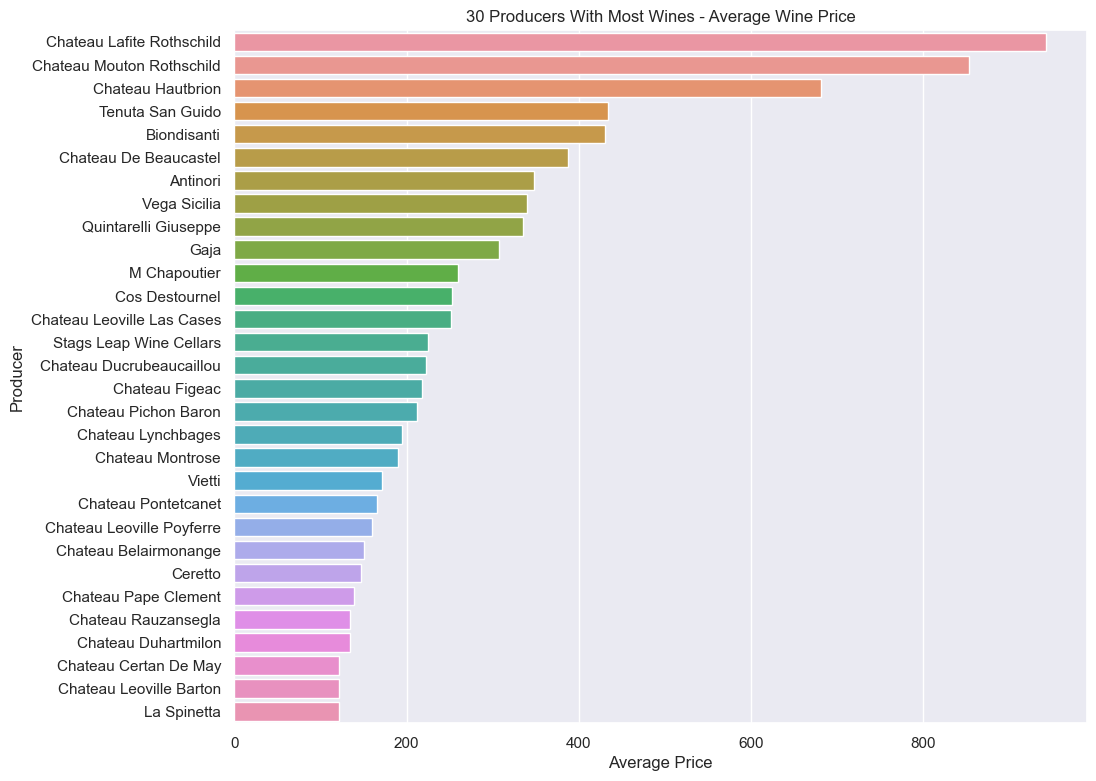

In [237]:
n_producers = 30
top_producers = df['producer'].value_counts().head(n_producers).index
filtered_df = df[df['producer'].isin(top_producers)]
average_prices = filtered_df.groupby('producer')['price'].mean().reset_index()
to_plot = average_prices.sort_values(by='price', ascending=False)

plt.figure(figsize=(11, 9))

sns.barplot(x='price', y='producer', data=to_plot)

plt.xlabel('Average Price')
plt.ylabel('Producer')
plt.title(f'{n_producers} Producers With Most Wines - Average Wine Price');

print(df['producer'].value_counts().head(n_producers))

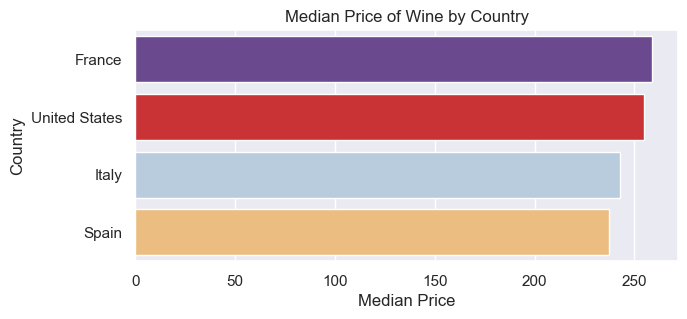

In [238]:
# Chatgpt helped me pick out some pretty colours. 
country_colour_mapping  = {
    'France': '#6a3d9a',  
    'United States': '#e31a1c', 
    'Italy': '#b3cde3', 
    'Spain': '#fdbf6f'
}

n_countries = 10
countrylist = list(df['country'].value_counts().head(n_countries).index)
top_countries = df[df['country'].isin(countrylist)]
avg_price_by_country = top_countries.groupby('country')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 3))
sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index, palette = country_colour_mapping)
plt.xlabel('Median Price')
plt.ylabel('Country')
plt.title('Median Price of Wine by Country');

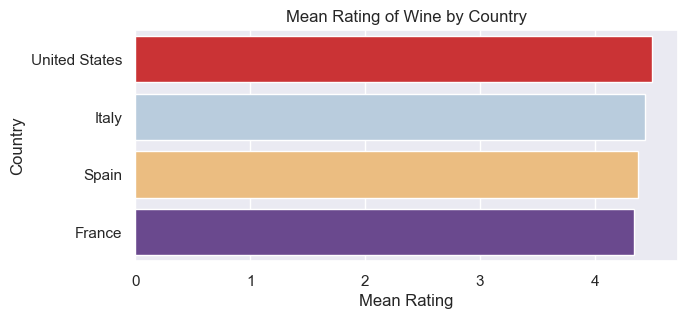

In [239]:
# Average rating by country (using only wines with more than 25 ratings) 
avg_rating_by_country = top_countries.groupby('country')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(7, 3))
sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index, palette = country_colour_mapping)
plt.xlabel('Mean Rating')
plt.ylabel('Country')
plt.title('Mean Rating of Wine by Country');

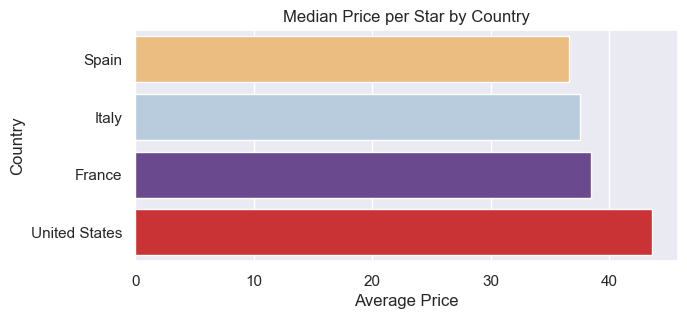

In [240]:
avg_price_per_star_by_country = top_countries.groupby('country')['price_per_star'].median().sort_values(ascending=True)
plt.figure(figsize=(7, 3))
sns.barplot(x=avg_price_per_star_by_country.values, y=avg_price_per_star_by_country.index, palette = country_colour_mapping)
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.title('Median Price per Star by Country');

# Categoricals

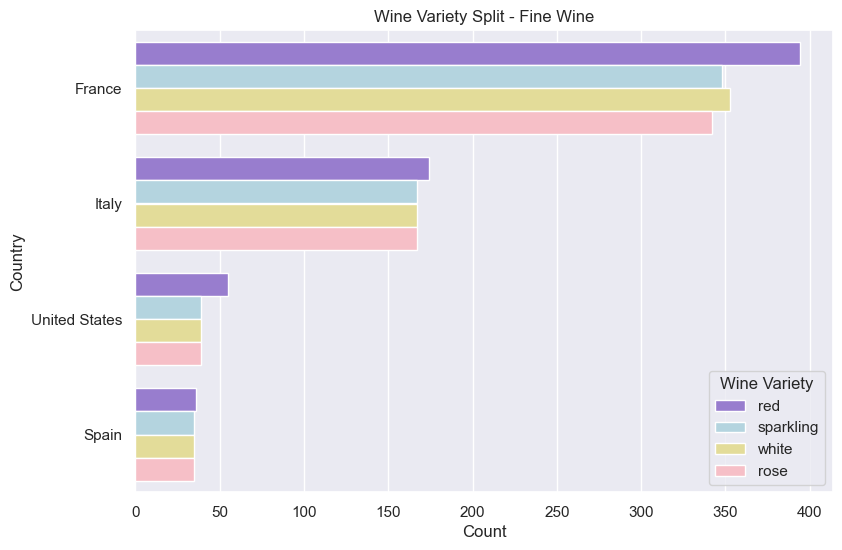

In [269]:
n_countries = 5

top_countries = df['country'].value_counts().nlargest(n_countries).index
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(9, 6))

sns.countplot(y='country', hue='wine_variety', data=df_top_countries,
              palette=colour_mapping)

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Wine Variety Split - Fine Wine')

plt.legend(title='Wine Variety');

# Digging Deeper - France

### Vintage Analysis 

In [242]:
france = df[df['country'] == 'France'].copy()

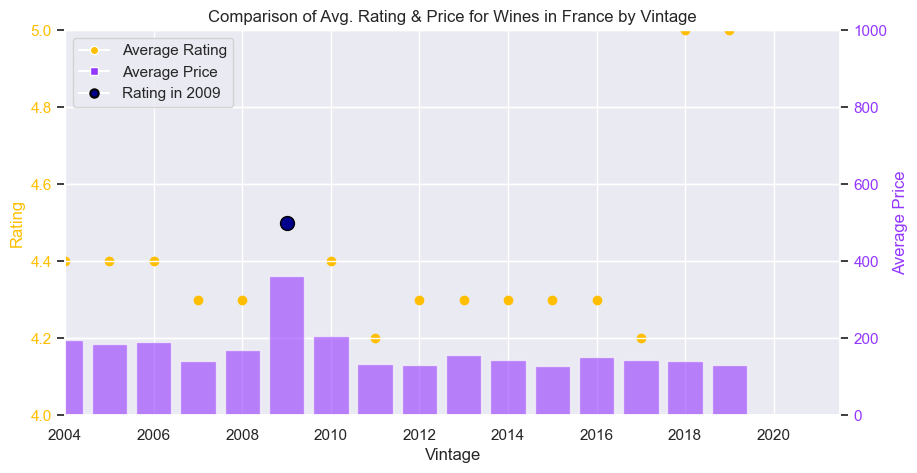

In [243]:
vis.plot_country_vintage_comparison(df, 2009, 'France', pricexmax=1000, rateymin=4)

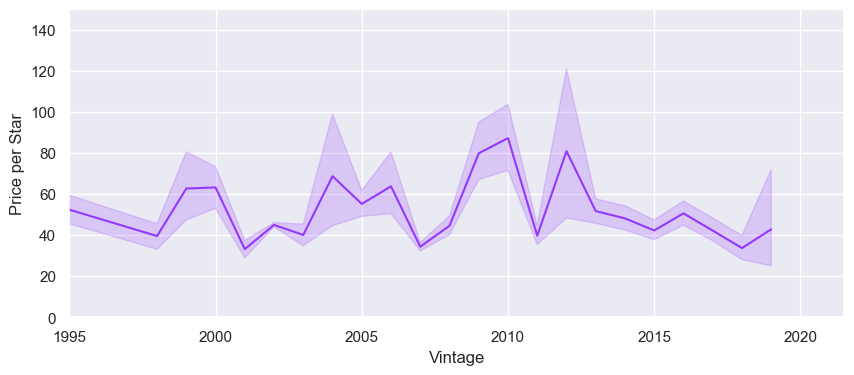

In [244]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=france, x='vintage', y='price_per_star', color ='#9437FF')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(1995,2021.5)
plt.ylim(0,150);

- 2011, 2007 and 2015 potential bargain years. 

In [245]:
vis.compare_close_vintages_in_a_country(df, 'France', 2015)

,Vintage,Avg Rating,Avg Price
21,2012,4.3,129.83
22,2013,4.3,157.58
23,2014,4.3,142.10
24,2015,4.3,127.97
25,2016,4.3,150.44
26,2017,4.2,142.78
27,2018,5.0,139.99


In [246]:
vis.compare_close_vintages_in_a_country(df, 'France', 2007)

,Vintage,Avg Rating,Avg Price
13,2004,4.4,194.00
14,2005,4.4,184.39
15,2006,4.4,189.32
16,2007,4.3,139.96
17,2008,4.3,169.99
18,2009,4.5,362.38
19,2010,4.4,205.06


- 2018, 2012 and 2014 portentially good value vintages in France. 
- 2012 for example has a higher rating than the three years after and equal to the year before but it is on average $10 cheaper than 2011 and 2013!

## Regions 

Looking at a region in france that is highly represented in the dataset and one region in Spain through the same lense. 

In [247]:
france['region'].value_counts()

region
Saintemilion Grand Cru                   248
Pauillac                                 236
Saintjulien                              188
Pomerol                                  157
Pessacleognan                            128
Margaux                                   94
Saintestephe                              72
Hermitage                                 56
Chateauneufdupape                         36
Coterotie                                 28
Nuitssaintgeorges                         16
Corton Grand Cru                          16
Pessac-Leognan                             8
Vosneromanee                               8
Nuitssaintgeorges 1Er Cru Aux Perdrix      8
Echezeaux Grand Cru                        8
Volnay Premier Cru                         8
Nuitssaintgeorges Premier Cru              8
Clos Vougeot Grand Cru                     8
St-Julien                                  7
Champagne                                  6
Aloxe-Corton                               6
Vos

In [248]:
france['bordeaux'] = france['region'].isin(['Bordeaux','Saintemilion Grand Cru', 
                                            'Pauillac', 'Saintjulien', 'Pomerol','Pessacleognan',
                                            'Margaux', 'Saintestephe', 'Pessac-Leognan']).copy()

In [249]:
bordeaux =  france[france['bordeaux'] == True]

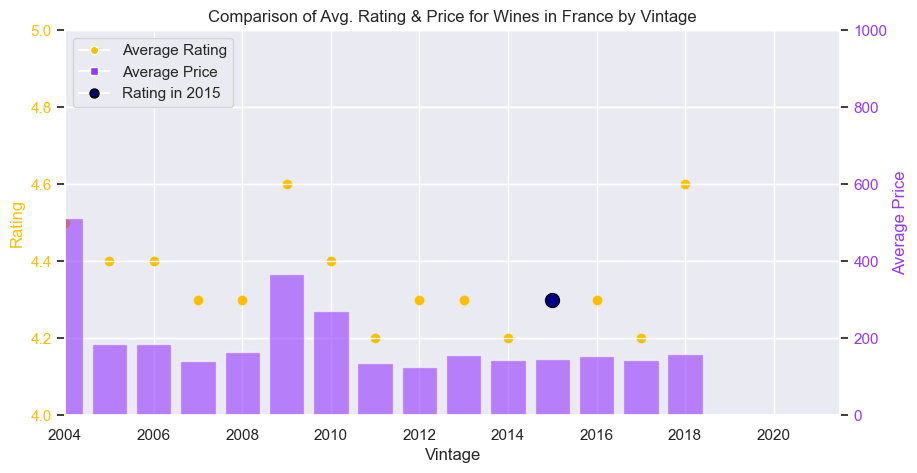

In [250]:
vis.plot_country_vintage_comparison(bordeaux, 2015, 'France', pricexmax=1000, rateymin=4)

In [251]:
# Calculate the average rating per vintage and reset index to make 'vintage' a column
avg_rating_by_vintage = bordeaux.groupby('vintage')['rating'].mean().reset_index(name='avg_vintage_rating')

# Merge this average rating back into the original DataFrame
bordeaux = bordeaux.merge(avg_rating_by_vintage, on='vintage')

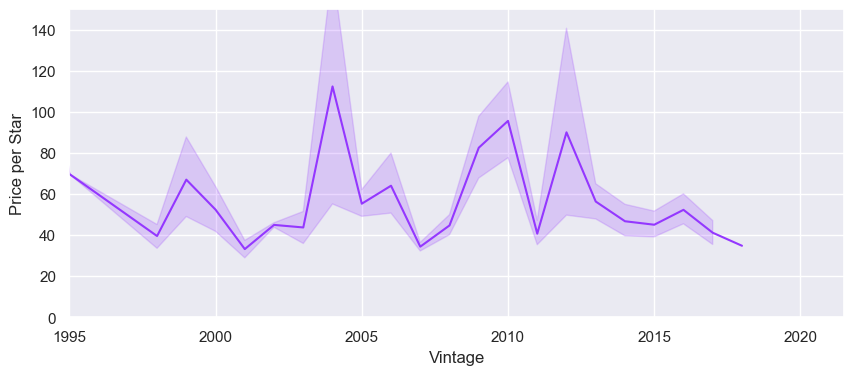

In [252]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=bordeaux, x='vintage', y='price_per_star', color ='#9437FF')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(1995,2021.5)
plt.ylim(0,150);

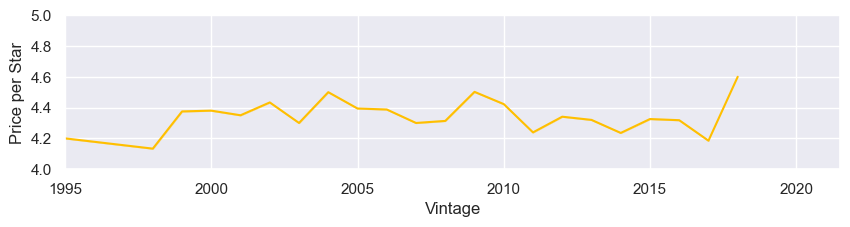

In [253]:
plt.figure(figsize=(10, 2))
sns.lineplot(data=bordeaux, x='vintage', y='avg_vintage_rating', color ='#FFBF00')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(1995,2021.5)
plt.ylim(4,5);

## Finding Underpriced Wines 

In [254]:
bordeaux.drop(columns=['abv', 'reviewed_by',
       'from_vivino', 'age'], inplace=True)

In [255]:
bordeaux.columns

Index(['region', 'country', 'vintage', 'producer', 'wine_variety',
       'grape_variety', 'price', 'rating', 'rating_qty', 'log_price',
       'log_price_per_star', 'price_per_star', 'bordeaux',
       'avg_vintage_rating'],
      dtype='object')

In [256]:
vintage_price_per_star = bordeaux.groupby('vintage')['price_per_star'].mean().reset_index(name='rvint_price_per_star')
bordeaux = bordeaux.merge(vintage_price_per_star, on='vintage')

In [257]:
# Make a column for the difference between the average price per star and the average price per star for each region-vintage
bordeaux['price_per_star_diff'] = bordeaux['price_per_star'] - bordeaux['rvint_price_per_star']

In [258]:
producer_avg_pps_diff = bordeaux.groupby('producer')['price_per_star_diff'].mean().reset_index(name='avg_pps_diff')
producer_avg_pps_diff_ = bordeaux.merge(producer_avg_pps_diff, on='producer')
producer_shortlist = producer_avg_pps_diff_[producer_avg_pps_diff_['avg_pps_diff'] < -20]

In [259]:
final_list = ['Chateau Belairmonange', 'Chateau Certan De May', 'Chateau Duhartmilon', 'Chateau Leoville Poyferre', 'Chateau Leoville Barton', 
'Chateau Hautbailly', 'Chateau Latour A Pomerol']
more_than_ftn = producer_shortlist[producer_shortlist['producer'].isin(final_list)]

In [268]:
more_than_ftn['producer'].value_counts()

producer
Chateau Belairmonange        32
Chateau Certan De May        28
Chateau Duhartmilon          25
Chateau Leoville Poyferre    24
Chateau Leoville Barton      20
Chateau Hautbailly           17
Chateau Latour A Pomerol     16
Name: count, dtype: int64

Avg rating 
 producer
Chateau Belairmonange        4.212500
Chateau Certan De May        4.228571
Chateau Duhartmilon          4.104000
Chateau Hautbailly           4.200000
Chateau Latour A Pomerol     4.175000
Chateau Leoville Barton      4.300000
Chateau Leoville Poyferre    4.350000
Name: rating, dtype: float64
Avg price 
 producer
Chateau Belairmonange        150.405000
Chateau Certan De May        121.825714
Chateau Duhartmilon          133.945200
Chateau Hautbailly           135.557059
Chateau Latour A Pomerol     113.070000
Chateau Leoville Barton      119.570000
Chateau Leoville Poyferre    160.630000
Name: price, dtype: float64


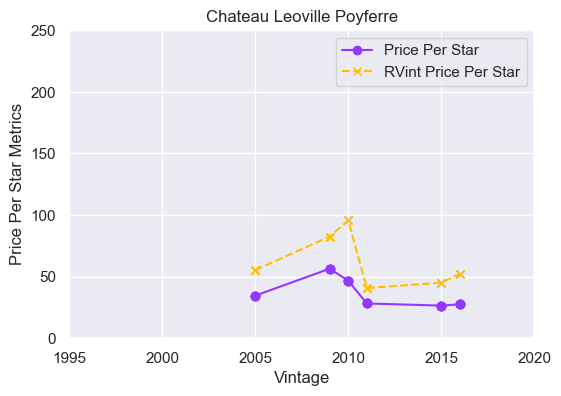

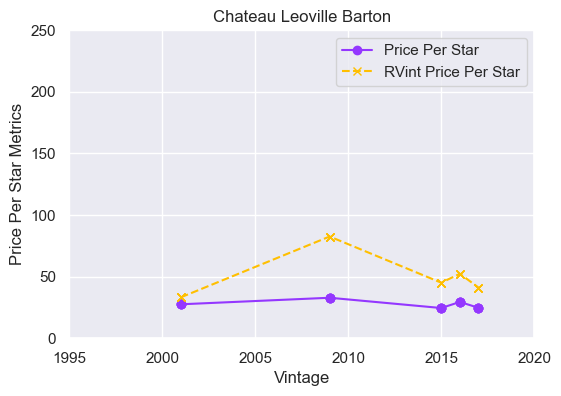

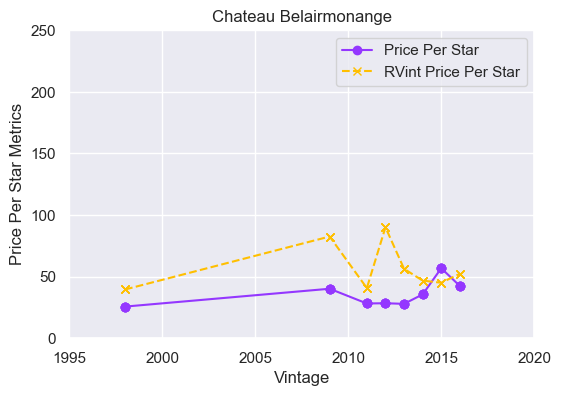

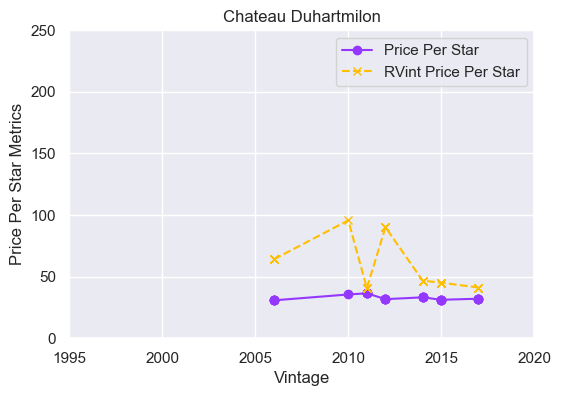

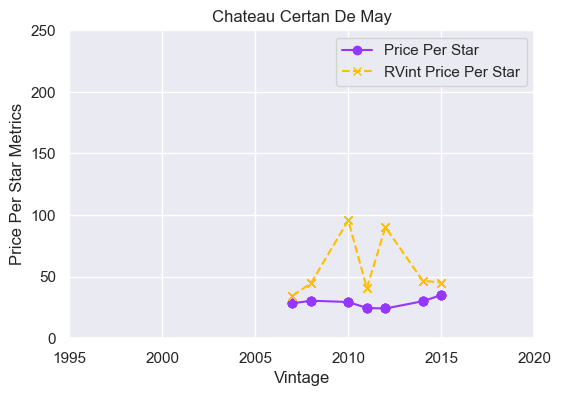

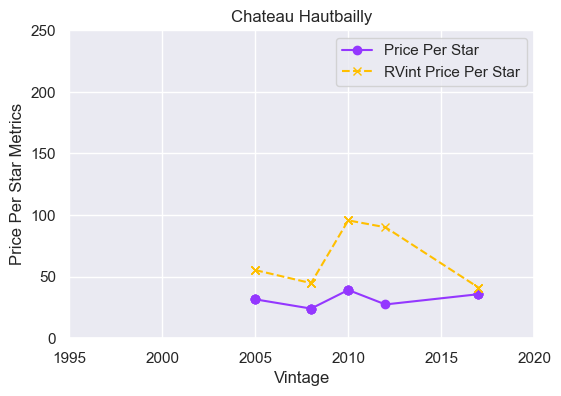

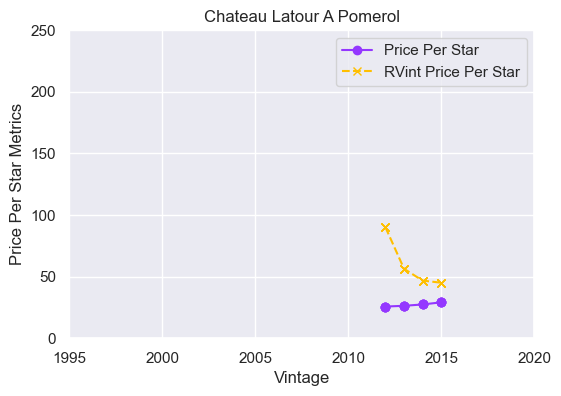

In [266]:
vis.plot_producer_price_per_star(more_than_ftn, ylim = 250, xlimmin= 1995, xlimmax=2020) 